In [1]:
import torch
import pandas as pd
from models.RecSysFlat import RecSysGarbageNetV2
import data_mgmt.RecSysData as rsd
from data_mgmt.RecSysDataTest import TestRecSysData
import seaborn as sns
import numpy as np
from torch.optim.swa_utils import AveragedModel, SWALR

In [3]:
ppath="//home/rster/sw/cmu_msba_2022_ml_applications_2/data/"
PATH='//home/rster/sw/cmu_msba_2022_ml_applications_2/src/models/saved/jimlad.pkl'
PATH2='//home/rster/sw/cmu_msba_2022_ml_applications_2/src/models/saved/jimswa.pkl'
test_data_file = ppath+"pairs_Rating.txt"

omfg = rsd.RecSysData(ppath)
wtfbbq = omfg.splitValidation(preshuffle=True, fraction=0.05)
trsd = TestRecSysData(omfg.df_data, test_data_file,
                        transform=omfg.transform)

tdl1 = torch.utils.data.DataLoader(omfg, batch_size=50000, shuffle=False)
tdl2 = torch.utils.data.DataLoader(trsd, batch_size=50000, shuffle=False)

n_user = omfg.df_data.uid.append(wtfbbq.df_data.uid).unique().shape[0]
n_item = omfg.df_data.pid.append(wtfbbq.df_data.pid).unique().shape[0]

model = RecSysGarbageNetV2(n_user,n_item,4)
swa_model = AveragedModel(model)

model.load_state_dict(torch.load(PATH))
swa_model.load_state_dict(torch.load(PATH2))

<All keys matched successfully>

In [82]:
len(tdl1.dataset)

190000

In [4]:
def test_loop(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    loss = torch.zeros(1).cuda()
    predictions=[]

    with torch.no_grad():
        for X in dataloader:
            pred = model(X.type(torch.long)).flatten()
            predictions.append(pred)

    return predictions

In [5]:
PREDICTIT = test_loop(tdl2, model)
outoutout=trsd.df_data.copy()
outoutout['rating']=PREDICTIT[0].numpy()
ininin = omfg.df_data.copy()

In [ ]:
outoutout.to_csv('treeworld.csv')

In [6]:
#outoutout.rating = np.round(outoutout.rating)
outoutout.loc[outoutout.rating < 1.0,'rating'] = 1.0
outoutout.loc[outoutout.rating > 5.0,'rating'] = 5.0

In [7]:
ininin['set']='train'
outoutout['set']='test'
full=ininin.append(outoutout)

In [ ]:
full.to_csv('yas2.csv')

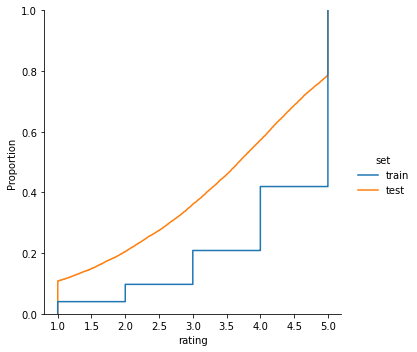

In [8]:
sns.displot(data=full.reset_index(),x='rating',kind='ecdf',hue='set')

In [22]:
with open('pairs_Rating_2021_12_10_1839_noround.txt','w') as filee:
    filee.write("reviewerID-itemID,prediction\n")
    for i in range(len(outoutout)):
        filee.write(f"{outoutout.reviewerID.iloc[i]}-{outoutout.itemID.iloc[i]},{outoutout.rating.iloc[i]}\n")

In [ ]:
for i in range(len(outoutout)):
    print(outoutout.reviewerID.iloc[i])